In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

# Multiple Layer GRU

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.8.0


In [17]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [18]:
tokenizer = info.features['text'].encoder

In [19]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 18s 41ms/step - loss: 0.4562 - accuracy: 0.7739 - val_loss: 0.3099 - val_accuracy: 0.8751
Epoch 2/10
391/391 [==============================] - 16s 39ms/step - loss: 0.2250 - accuracy: 0.9153 - val_loss: 0.3048 - val_accuracy: 0.8780
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.1711 - accuracy: 0.9380 - val_loss: 0.3276 - val_accuracy: 0.8742
Epoch 4/10
391/391 [==============================] - 16s 39ms/step - loss: 0.1383 - accuracy: 0.9506 - val_loss: 0.3763 - val_accuracy: 0.8702
Epoch 5/10
391/391 [==============================] - 16s 39ms/step - loss: 0.1152 - accuracy: 0.9596 - val_loss: 0.4290 - val_accuracy: 0.8652
Epoch 6/10
391/391 [==============================] - 16s 39ms/step - loss: 0.0912 - accuracy: 0.9691 - val_loss: 0.4991 - val_accuracy: 0.8634
Epoch 7/10
391/391 [==============================] - 16s 39ms/step - loss: 0.0715 - accuracy: 0.9785 - val_loss: 0.5765 - val_accuracy:

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

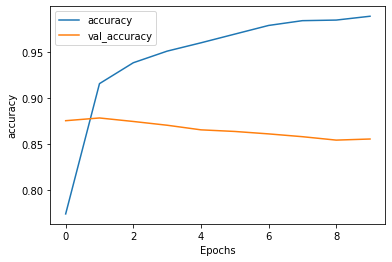

In [25]:
plot_graphs(history, 'accuracy')

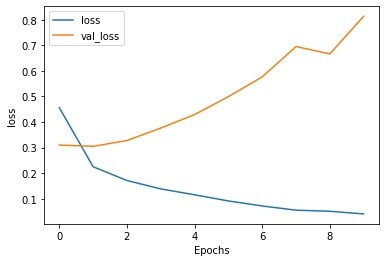

In [26]:
plot_graphs(history, 'loss')